# Week 8 Statistics Plots

## Table of Contents: 
1. Chart Using Pandas
2. Chart Using Matplotlib, Version 1
3. Chart Using Matplotlib, Version 2

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Display and download total chart: 
df = pd.read_csv('records.csv')
games = df
df

,Unnamed: 0,Game ID,Player 1,Player 2,Winner
0,0,1,jrs,robot,robot
1,1,2,jrs,prs,jrs
2,2,3,jrs,drs,drs
3,3,4,prs,drs,prs
4,4,5,prs,robot,prs
5,5,6,jrs,robot,jrs


### 1. Chart Using Pandas
- Making chart of win percentage by user over all games played:

In [21]:
names = pd.unique(df[["Player 1", "Player 2"]].values.ravel())
names

array(['jrs', 'robot', 'prs', 'drs'], dtype=object)

In [28]:
ratios = []

for name in names: 
    num_total = len(games[games["Player 1"] == name]) + len(games[games["Player 2"] == name])
    num_wins = len(games[games["Winner"] == name])
    ratio = num_wins / num_total
    ratios = np.append(ratios, ratio)

array([0.5       , 0.33333333, 0.66666667, 0.5       ])

In [29]:
df_1 = pd.DataFrame([])
df_1['Initial/Name'] = names
df_1['Win Ratio'] = ratios
df_1

,Initial/Name,Win Ratio
0,jrs,0.500000
1,robot,0.333333
2,prs,0.666667
3,drs,0.500000


### 2. Chart Using Matplotlib, Version 1
- Ratio of Player 1 winning OVER Player 2 over time.

In [65]:
games.iloc[1]

Unnamed: 0      1
Game ID         2
Player 1      jrs
Player 2      prs
Winner        jrs
Name: 1, dtype: object

In [66]:
player_1_tally = 0
player_2_tally = 0
ratios = []

for i in range(len(games)):
    if games.iloc[i]['Player 1'] == games.iloc[i]['Winner']: 
        player_1_tally = player_1_tally + 1
    else: 
        player_2_tally = player_2_tally + 1
    total = player_1_tally + player_2_tally
    ratios = np.append(ratios, player_1_tally/total)
    
ratios

array([0.        , 0.5       , 0.33333333, 0.5       , 0.6       ,
       0.66666667])

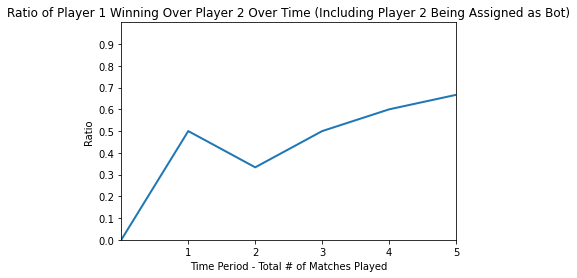

In [78]:
x = range(len(games))
y = ratios

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(0, 5), xticks=np.arange(1, 8),
       ylim=(0, 1), yticks=np.arange(0, 1, 0.1))

plt.title('Ratio of Player 1 Winning Over Player 2 Over Time (Including Player 2 Being Assigned as Bot)') 
plt.xlabel('Time Period - Total # of Matches Played')
plt.ylabel('Ratio')

plt.show()

### 3. Chart Using Matplotlib, Version 2
- Making pie chart of portion of games player against a robot (bot):
    - Of those against the robot, how many did the robot win?

In [42]:
num_w_robot = len(games[games["Player 1"] == 'robot']) + len(games[games["Player 2"] == 'robot'])
num_wo_robot = len(games) - num_w_robot
num_w_robot_win = len(games[games["Winner"] == 'robot'])
num_w_robot_loss = num_w_robot - num_w_robot_win

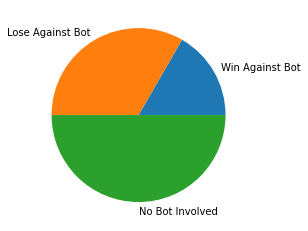

In [44]:
y = np.array([num_w_robot_win, num_w_robot_loss, num_wo_robot])
mylabels = ["Win Against Bot", "Lose Against Bot", "No Bot Involved"]

plt.pie(y, labels = mylabels)
plt.show()